## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [16]:
import os
import keras
from keras.utils import np_utils


# 請嘗試設定 GPU：os.environ
import tensorflow as tf
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction = 0)
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(gpu_options = gpu_options))

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x ):
    x = x.reshape((len(x),-1))
    x =( ( 255 - x ) / 255 )
    
    return x
    

def preproc_y(y):
    y = np_utils.to_categorical(y)
    return y
                            
    

In [7]:

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
"""Code Here
建立你的神經網路
"""
from keras.layers import Input,Dense
from keras.models import Model

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128 , 64 , 32 , 16]):
    input_layer = Input(input_shape)
    for i , unit in enumerate(num_neurons):
        if i ==0:
            x = Dense(units = unit , activation = 'relu')(input_layer)
        else:
            x = Dense(units = unit , activation = 'relu')(x)
    out = Dense(units = output_units , activation = 'softmax')(x)
    model = Model(inputs = [input_layer] , outputs = [out])
    return model

model = build_mlp(x_train.shape[-1:], output_units=10, num_neurons=[512, 256, 128 , 64 , 32 , 16])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528 

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
train_history = model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=0.2,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 76us/step - loss: 2.3038 - accuracy: 0.0997 - val_loss: 2.2906 - val_accuracy: 0.1084
Epoch 2/100
40000/40000 [==============================] - 2s 62us/step - loss: 2.2102 - accuracy: 0.1569 - val_loss: 2.0606 - val_accuracy: 0.2276
Epoch 3/100
40000/40000 [==============================] - 3s 63us/step - loss: 1.9926 - accuracy: 0.2546 - val_loss: 1.9328 - val_accuracy: 0.2807
Epoch 4/100
40000/40000 [==============================] - 3s 64us/step - loss: 1.8981 - accuracy: 0.3010 - val_loss: 1.8472 - val_accuracy: 0.3317
Epoch 5/100
40000/40000 [==============================] - 3s 66us/step - loss: 1.7989 - accuracy: 0.3504 - val_loss: 1.7628 - val_accuracy: 0.3666
Epoch 6/100
40000/40000 [==============================] - 3s 64us/step - loss: 1.7141 - accuracy: 0.3855 - val_loss: 1.8484 - val_accuracy: 0.3589
Epoch 7/100
40000/40000 [==============================] - 3s 

Epoch 56/100
40000/40000 [==============================] - 3s 68us/step - loss: 0.7396 - accuracy: 0.7327 - val_loss: 1.9190 - val_accuracy: 0.4955
Epoch 57/100
40000/40000 [==============================] - 3s 67us/step - loss: 0.7248 - accuracy: 0.7381 - val_loss: 1.9584 - val_accuracy: 0.4841
Epoch 58/100
40000/40000 [==============================] - 3s 65us/step - loss: 0.7278 - accuracy: 0.7374 - val_loss: 2.0332 - val_accuracy: 0.4868
Epoch 59/100
40000/40000 [==============================] - 3s 63us/step - loss: 0.7161 - accuracy: 0.7425 - val_loss: 1.9803 - val_accuracy: 0.5004
Epoch 60/100
40000/40000 [==============================] - 2s 62us/step - loss: 0.7117 - accuracy: 0.7443 - val_loss: 1.9783 - val_accuracy: 0.5002
Epoch 61/100
40000/40000 [==============================] - 3s 66us/step - loss: 0.6835 - accuracy: 0.7527 - val_loss: 2.0509 - val_accuracy: 0.4932
Epoch 62/100
40000/40000 [==============================] - 3s 65us/step - loss: 0.6865 - accuracy: 0.7512

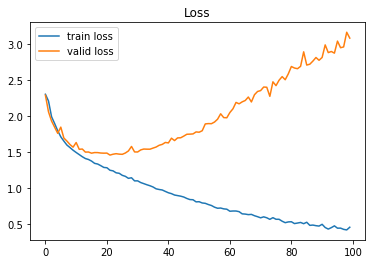

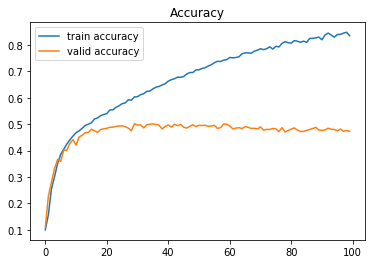

In [13]:
import matplotlib.pyplot as plt


train_loss = train_history.history["loss"]
valid_loss = train_history.history["val_loss"]

train_acc = train_history.history["accuracy"]
valid_acc = train_history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()